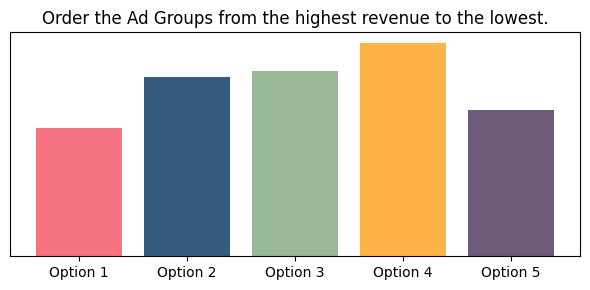

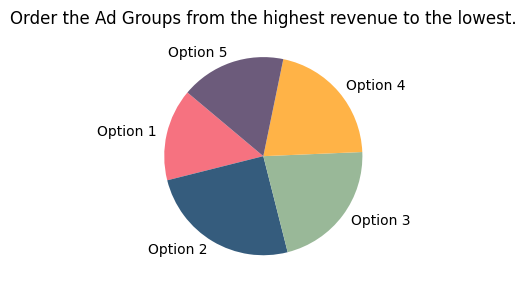

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("shopping_clean.csv")

revenue_by_group = df.groupby('Ad Group')['Revenue'].sum().sort_values(ascending=False).head(5)

revenue_masked_bar = revenue_by_group.sample(frac=1, random_state=8)
bar_actual_labels = revenue_masked_bar.index.tolist()
revenue_masked_bar.index = [f"Option {i+1}" for i in range(len(revenue_masked_bar))]

colors = ['#F67280', '#355C7D', '#99B898', '#FFB347', '#6C5B7B']
plt.figure(figsize=(6, 3))
plt.bar(revenue_masked_bar.index, revenue_masked_bar.values, color=colors)
plt.title("Order the Ad Groups from the highest revenue to the lowest.")
plt.xticks(rotation=0)
plt.gca().axes.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

revenue_masked_pie = revenue_by_group.sample(frac=1, random_state=5)
pie_actual_labels = revenue_masked_pie.index.tolist()
revenue_masked_pie.index = [f"Option {i+1}" for i in range(len(revenue_masked_pie))]

plt.figure(figsize=(6, 3))
plt.pie(revenue_masked_pie.values, labels=revenue_masked_pie.index, colors=colors, startangle=140)
plt.title("Order the Ad Groups from the highest revenue to the lowest.")
plt.tight_layout()
plt.show()


In [2]:
print("Bar Chart - Revenue Order (Highest to Lowest):")
sorted_bar = revenue_masked_bar.sort_values(ascending=False)
for i, opt in enumerate(sorted_bar.index, 1):
    actual_label = bar_actual_labels[revenue_masked_bar.index.get_loc(opt)]
    print(f"{i}. {opt} → {actual_label}")

print("Pie Chart - Revenue Order (Highest to Lowest):")
sorted_pie = revenue_masked_pie.sort_values(ascending=False)
for i, opt in enumerate(sorted_pie.index, 1):
    actual_label = pie_actual_labels[revenue_masked_pie.index.get_loc(opt)]
    print(f"{i}. {opt} → {actual_label}")

Bar Chart - Revenue Order (Highest to Lowest):
1. Option 4 → Shop - 1:1 - Mob - [shop promo code]
2. Option 3 → Shop - 1:1 - Mob - [shop coupon]
3. Option 2 → Shop - 1:1 - Desk - [shop promo code]
4. Option 5 → Shop - 1:1 - Desk - [shop coupon]
5. Option 1 → Shop - 1:1 - Mob - [shop coupon code]
Pie Chart - Revenue Order (Highest to Lowest):
1. Option 2 → Shop - 1:1 - Mob - [shop promo code]
2. Option 3 → Shop - 1:1 - Mob - [shop coupon]
3. Option 4 → Shop - 1:1 - Desk - [shop promo code]
4. Option 5 → Shop - 1:1 - Desk - [shop coupon]
5. Option 1 → Shop - 1:1 - Mob - [shop coupon code]


C:\Users\RTLFe\AppData\Local\Temp\ipykernel_23924\1237159203.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_month = df.groupby('Month')['Revenue'].sum().sort_values(ascending=False).head(5)


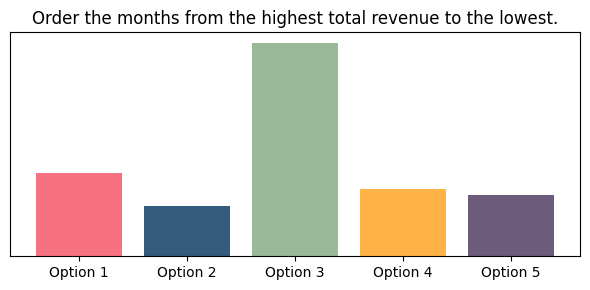

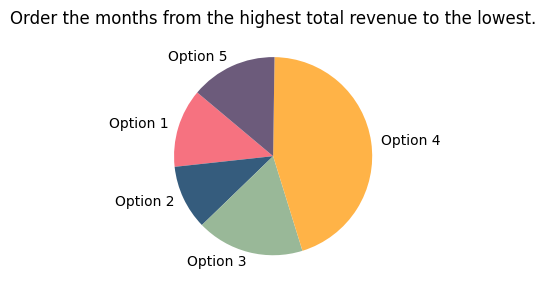

In [3]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

revenue_by_month = df.groupby('Month')['Revenue'].sum().sort_values(ascending=False).head(5)

revenue_masked_bar = revenue_by_month.sample(frac=1, random_state=20)
bar_actual_labels = revenue_masked_bar.index.tolist()
revenue_masked_bar.index = [f"Option {i+1}" for i in range(len(revenue_masked_bar))]

plt.figure(figsize=(6, 3))
plt.bar(revenue_masked_bar.index, revenue_masked_bar.values, color=colors)
plt.title("Order the months from the highest total revenue to the lowest.")
plt.xticks(rotation=0)
plt.gca().axes.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

revenue_masked_pie = revenue_by_month.sample(frac=1, random_state=3)
pie_actual_labels = revenue_masked_pie.index.tolist()
revenue_masked_pie.index = [f"Option {i+1}" for i in range(len(revenue_masked_pie))]

plt.figure(figsize=(6, 3))
plt.pie(revenue_masked_pie.values, labels=revenue_masked_pie.index, colors=colors, startangle=140)
plt.title("Order the months from the highest total revenue to the lowest.")
plt.tight_layout()
plt.show()


In [4]:
print("Bar Chart - Revenue Order (Highest to Lowest):")
sorted_bar = revenue_masked_bar.sort_values(ascending=False)
for i, opt in enumerate(sorted_bar.index, 1):
    actual_label = bar_actual_labels[revenue_masked_bar.index.get_loc(opt)]
    print(f"{i}. {opt} → {actual_label}")

print("Pie Chart - Revenue Order (Highest to Lowest):")
sorted_pie = revenue_masked_pie.sort_values(ascending=False)
for i, opt in enumerate(sorted_pie.index, 1):
    actual_label = pie_actual_labels[revenue_masked_pie.index.get_loc(opt)]
    print(f"{i}. {opt} → {actual_label}")

Bar Chart - Revenue Order (Highest to Lowest):
1. Option 3 → November
2. Option 1 → July
3. Option 4 → October
4. Option 5 → August
5. Option 2 → September
Pie Chart - Revenue Order (Highest to Lowest):
1. Option 4 → November
2. Option 3 → July
3. Option 5 → October
4. Option 1 → August
5. Option 2 → September


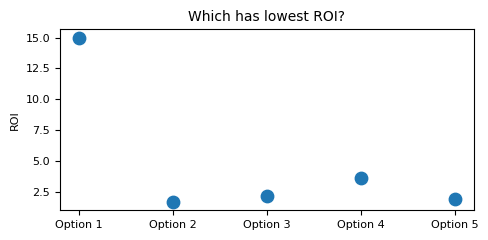

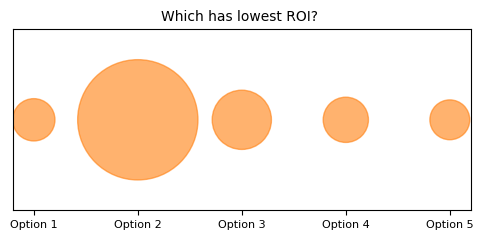

Scatter Chart - Masked to Actual Ad Group Mapping:
Option 1: Shop - Exact - Desk - Black Friday/Cyber Monday
Option 2: Shop - Phrase - Desk - Free Shipping
Option 3: Shop - Phrase - Mob - Competitor
Option 4: Shop - Exact - Mob - Black Friday/Cyber Monday
Option 5: Shop - Phrase - Desk - Competitor
Bubble Chart - Masked to Actual Ad Group Mapping:
Option 1: Shop - Phrase - Desk - Competitor
Option 2: Shop - Exact - Desk - Black Friday/Cyber Monday
Option 3: Shop - Exact - Mob - Black Friday/Cyber Monday
Option 4: Shop - Phrase - Mob - Competitor
Option 5: Shop - Phrase - Desk - Free Shipping


In [5]:

roi_df = df.groupby('Ad Group')[['Revenue', 'Cost']].sum()
roi_df = roi_df[roi_df['Cost'] > 0]  
roi_df['ROI'] = roi_df['Revenue'] / roi_df['Cost']

top_5_roi = roi_df.sort_values(by='ROI', ascending=False).head(5)

scatter_masked_df = top_5_roi.sample(frac=1, random_state=101).copy()
scatter_actual_labels = scatter_masked_df.index.tolist()
scatter_masked_df.index = [f"Option {i+1}" for i in range(len(scatter_masked_df))]

bubble_masked_df = top_5_roi.sample(frac=1, random_state=9).copy()
bubble_actual_labels = bubble_masked_df.index.tolist()
bubble_masked_df.index = [f"Option {i+1}" for i in range(len(bubble_masked_df))]

plt.figure(figsize=(5, 2.5))
plt.scatter(scatter_masked_df.index, scatter_masked_df['ROI'], color='#1f77b4', s=80)
plt.title("Which has lowest ROI?", fontsize=10)
plt.ylabel("ROI", fontsize=8)
plt.xticks(rotation=0, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 2.5))
bubble_sizes = bubble_masked_df['ROI'] * 500
plt.scatter(bubble_masked_df.index, [1]*len(bubble_masked_df), s=bubble_sizes, alpha=0.6, color='#ff7f0e')
plt.title("Which has lowest ROI? ", fontsize=10)
plt.xticks(rotation=0, fontsize=8)
plt.yticks([])
plt.tight_layout()
plt.show()

print("Scatter Chart - Masked to Actual Ad Group Mapping:")
scatter_mapping = dict(zip(scatter_masked_df.index, scatter_actual_labels))
for option, name in scatter_mapping.items():
    print(f"{option}: {name}")

print("Bubble Chart - Masked to Actual Ad Group Mapping:")
bubble_mapping = dict(zip(bubble_masked_df.index, bubble_actual_labels))
for option, name in bubble_mapping.items():
    print(f"{option}: {name}")

In [6]:
scatter_lowest_option = scatter_masked_df['ROI'].idxmin()
scatter_lowest_actual = scatter_mapping[scatter_lowest_option]
print(f"Scatter Chart - Lowest ROI: {scatter_lowest_option} → {scatter_lowest_actual}")

bubble_lowest_option = bubble_masked_df['ROI'].idxmin()
bubble_lowest_actual = bubble_mapping[bubble_lowest_option]
print(f"Bubble Chart - Lowest ROI: {bubble_lowest_option} → {bubble_lowest_actual}")

Scatter Chart - Lowest ROI: Option 2 → Shop - Phrase - Desk - Free Shipping
Bubble Chart - Lowest ROI: Option 5 → Shop - Phrase - Desk - Free Shipping


C:\Users\RTLFe\AppData\Local\Temp\ipykernel_23924\4157832128.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_df.groupby(['Month', 'Ad Group'])['Impressions']


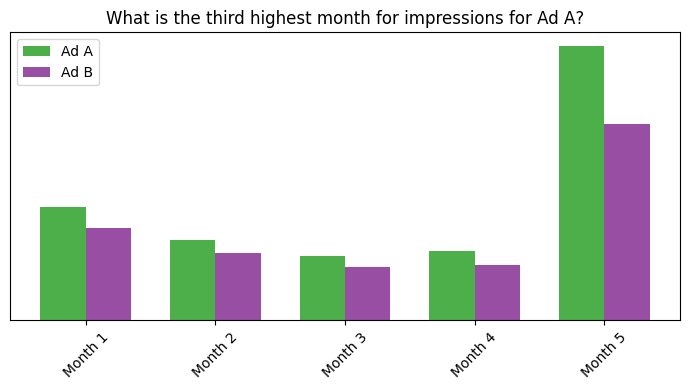

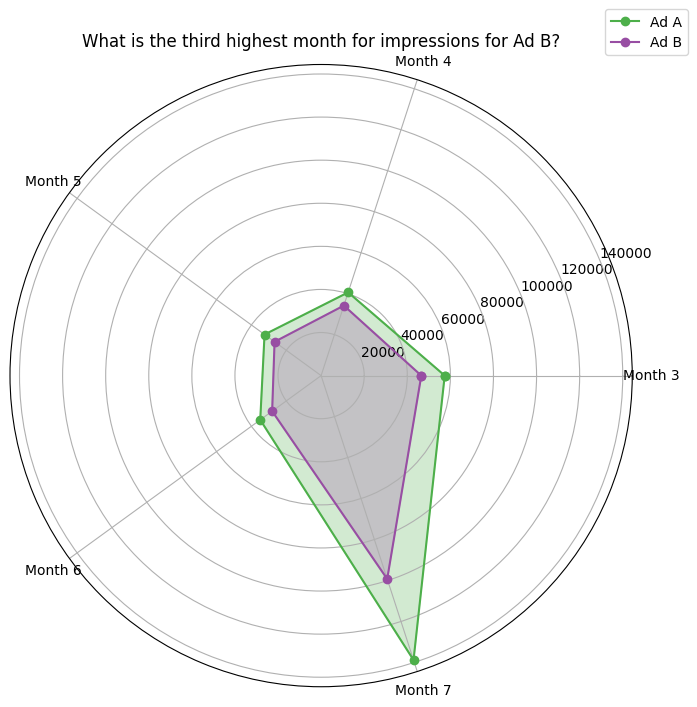

Bar Chart Month Masking:
{'Month 1': 'July', 'Month 2': 'August', 'Month 3': 'September', 'Month 4': 'October', 'Month 5': 'November'}
Radar Chart Month Masking:
{'Month 3': 'July', 'Month 4': 'August', 'Month 5': 'September', 'Month 6': 'October', 'Month 7': 'November'}


In [7]:
import numpy as np

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
selected_months = ['July', 'August', 'September', 'October', 'November']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

ad_a = 'Shop - 1:1 - Mob - [shop promo code]'
ad_b = 'Shop - 1:1 - Mob - [shop coupon code]'

filtered_df = df[df['Ad Group'].isin([ad_a, ad_b]) & df['Month'].isin(selected_months)].copy()
monthly_impressions = (
    filtered_df.groupby(['Month', 'Ad Group'])['Impressions']
    .sum()
    .unstack()
    .reindex(selected_months)
)


masked_bar_labels = [f"Month {i+1}" for i in range(len(selected_months))]
masked_radar_labels = [f"Month {i+3}" for i in range(len(selected_months))]  
bar_label_mapping = dict(zip(masked_bar_labels, selected_months))
radar_label_mapping = dict(zip(masked_radar_labels, selected_months))

bar_width = 0.35
x = range(len(masked_bar_labels))

plt.figure(figsize=(7, 4))
plt.bar([i - bar_width/2 for i in x], monthly_impressions[ad_a], width=bar_width, label='Ad A', color='#4daf4a')
plt.bar([i + bar_width/2 for i in x], monthly_impressions[ad_b], width=bar_width, label='Ad B', color='#984ea3')
plt.title("What is the third highest month for impressions for Ad A?")
plt.xticks(ticks=x, labels=masked_bar_labels, rotation=45)
plt.gca().axes.get_yaxis().set_visible(False)
plt.legend()
plt.tight_layout()
plt.show()

angles = np.linspace(0, 2 * np.pi, len(masked_radar_labels), endpoint=False).tolist()
angles += angles[:1]

b_values = monthly_impressions[ad_a].tolist() + [monthly_impressions[ad_a].tolist()[0]]
c_values = monthly_impressions[ad_b].tolist() + [monthly_impressions[ad_b].tolist()[0]]

fig = plt.figure(figsize=(7, 8))
ax = plt.subplot(111, polar=True)
ax.plot(angles, b_values, 'o-', label='Ad A', color='#4daf4a')
ax.plot(angles, c_values, 'o-', label='Ad B', color='#984ea3')
ax.fill(angles, b_values, alpha=0.25, color='#4daf4a')
ax.fill(angles, c_values, alpha=0.25, color='#984ea3')
ax.set_thetagrids(np.degrees(angles[:-1]), masked_radar_labels)
plt.title("What is the third highest month for impressions for Ad B?")
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.tight_layout()
plt.show()

print("Bar Chart Month Masking:")
print(bar_label_mapping)

print("Radar Chart Month Masking:")
print(radar_label_mapping)

In [8]:
ad_a_third = monthly_impressions[ad_a].sort_values(ascending=False).index[2]
print(f"Third-highest month for Ad A: {ad_a_third}")

ad_b_third = monthly_impressions[ad_b].sort_values(ascending=False).index[2]
print(f"Third-highest month for Ad B: {ad_b_third}")


Third-highest month for Ad A: August
Third-highest month for Ad B: August
